In [1]:
import numpy as np
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import pickle


In [2]:
# #############################################################################
# Load data
data = pd.read_csv('../../RealData/RealData_Small.csv')
#data = pd.read_csv('../../SynData/data/GeneratedData.csv')


In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#n = len(X)
#kf = KFold(n_splits=5)
#fold = 0
#for train_index, test_index in kf.split(X):
    #fold += 1
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit regression model
svr_lin = LinearSVR()
svr_lin.fit(X_train, y_train)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [5]:
prediction = svr_lin.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,0.2,0.207510
1,0.6,0.609063
2,0.2,0.200860
3,0.5,0.627958
4,0.4,0.596315
5,0.6,0.613277
6,0.3,0.410270
7,0.4,0.591958
8,0.8,0.627501
9,0.8,0.618527


Text(0, 0.5, 'Predicted Y')

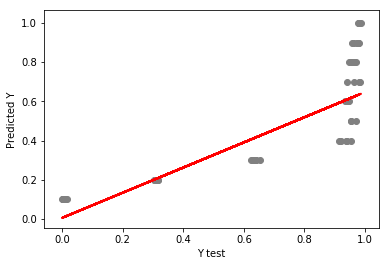

In [6]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")



In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))



MAE: 0.13501832532688504
MSE: 0.028454191279828938
RMSE: 0.1686837018796687


In [8]:
# save the model to disk
filename = '../models/linearSVR_model.sav'
pickle.dump(svr_lin, open(filename, 'wb'))

In [9]:
svr_lin.predict([[0]])

array([0.00507783])